### projet MLops 
#### Intégration MLOps pour l'Estimation des Probabilités de Défaut et la Gestion des Risques de Prêts
SIDIBE OUMOU MALIKA & NANDJUI BLESSON NAOMI
 

### Importation des librairies 

In [1]:
import pandas as pd
import numpy as np
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import mlflow
import streamlit as st
import joblib 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import streamlit as stE
import mlflow
import mlflow.sklearn
from imblearn.over_sampling import SMOTE
import sys
import sklearn
import mlflow.pyfunc  
import streamlit as st
import pandas as pdp
import os
print(os.getcwd())



c:\Users\LENOVO THINKPAD T480\Desktop\projet MLops


In [2]:
import matplotlib

In [3]:
import matplotlib

In [7]:
!pip install mlflow
!pip install --upgrade jinja2
!pip install --upgrade Flask
!pip install setuptools

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.2 MB 882.6 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.3 MB/s eta 0:00:00


In [5]:
# starts an MLflow server locally.
!mlflow server --host 127.0.0.1 --port 8080

^C


In [4]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

In [5]:

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")


In [10]:
all_experiments = client.search_experiments()

print(all_experiments)

[<Experiment: artifact_location='file:///c:/Users/LENOVO%20THINKPAD%20T480/Desktop/projet%20MLops/mlruns/834312447965853979', creation_time=1726091540075, experiment_id='834312447965853979', last_update_time=1726091540075, lifecycle_stage='active', name='Eperience_MLops2', tags={'department': 'Data',
 'mlflow.note.content': 'Projet Mlops_SDA à déployer AWSCette expérience '
                        'permet de rechercher le meilleur modéle',
 'project_name': 'Projet Mlops2',
 'project_quarter': 'septembre-2024',
 'team': 'stores-ml'}>, <Experiment: artifact_location='file:///c:/Users/LENOVO%20THINKPAD%20T480/Desktop/projet%20MLops/mlruns/362962538743456352', creation_time=1726087704316, experiment_id='362962538743456352', last_update_time=1726087704316, lifecycle_stage='active', name='Nom_de_votre_experiment', tags={}>, <Experiment: artifact_location='file:///c:/Users/LENOVO%20THINKPAD%20T480/Desktop/projet%20MLops/mlruns/0', creation_time=1725808820878, experiment_id='0', last_update_ti

In [15]:
import mlflow
from mlflow.tracking import MlflowClient


# MLflow pour interagir avec le serveur 
client = MlflowClient()

experiment_description = (
    "Projet Mlops_SDA à déployer AWS"
    "Cette expérience permet de rechercher le meilleur modéle"
)

# caractéristiques des runs 
experiment_tags = {
    "project_name": "Projet Mlops2",         
    "department": "Data",                  
    "team": "stores-ml",                    
    "project_quarter": "septembre-2024",           
    "mlflow.note.content": experiment_description  
}

# Créer une nouvelle expérience MLflow, en fournissant un nom unique
produce_bank_experiment = client.create_experiment(
    name="produce_bank_experiment", tags=experiment_tags
)

# Expérience active 
mlflow.set_experiment(experiment_id=produce_bank_experiment)

# création de l'expérience
print(f"Expérience créée avec l'ID : {produce_bank_experiment}")


Expérience créée avec l'ID : 989181608852358066


#### Chargement des Données

In [16]:
base = pd.read_csv("C:/Users/LENOVO THINKPAD T480/Desktop/projet MLops/Loan_Data.csv")


#### Data Info

In [17]:
# Dimention du Dataframe
base.shape 

(10000, 8)

In [18]:
# colonnes du DataFrame
print(base.columns)

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


In [19]:
# information sur notre base de données
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB
None


In [20]:
# verifions les types de données 
print(base.dtypes)

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object


#### Visualisation du dataframe

In [21]:
base.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


vérification des valeurs manquantes

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

In [30]:
%matplotlib inline


<Axes: >

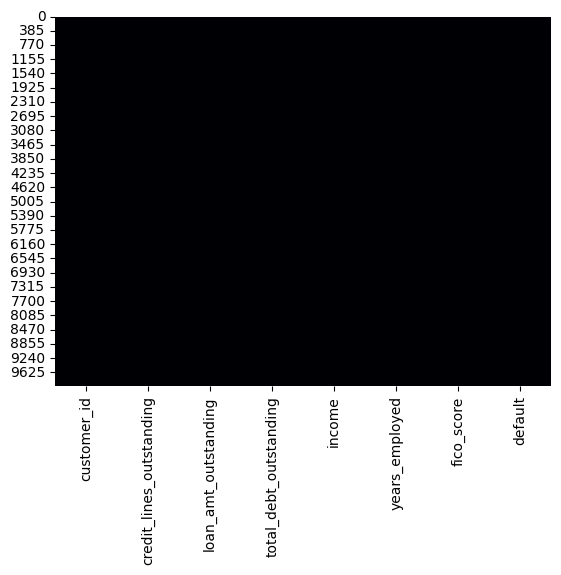

In [31]:
sns.heatmap(base.isnull(), cmap='magma', cbar=False)

Aucunes données manquantes 

statistiques descriptives 

In [32]:
base.describe().T 

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,4.974577e+06,2.293890e+06,1.000324e+06,2.977661e+06,4.989502e+06,6.967210e+06,8.999789e+06
credit_lines_outstanding,10000.0,1.461200e+00,1.743846e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
loan_amt_outstanding,10000.0,4.159677e+03,1.421399e+03,4.678397e+01,3.154235e+03,4.052377e+03,5.052898e+03,1.075068e+04
total_debt_outstanding,10000.0,8.718917e+03,6.627165e+03,3.165273e+01,4.199836e+03,6.732407e+03,1.127226e+04,4.368878e+04
income,10000.0,7.003990e+04,2.007221e+04,1.000000e+03,5.653987e+04,7.008583e+04,8.342917e+04,1.484122e+05
years_employed,10000.0,4.552800e+00,1.566862e+00,0.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01
fico_score,10000.0,6.375577e+02,6.065791e+01,4.080000e+02,5.970000e+02,6.380000e+02,6.790000e+02,8.500000e+02
default,10000.0,1.851000e-01,3.883981e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


On constate que les données montrent une variabilité importante dans les montants de prêts, les dettes et les revenus des clients. Environ 18.5 % des clients sont en défaut de paiement, ce qui constitue un risque notable pour la banque. La majorité des clients ont des scores FICO moyens et des antécédents d'emploi stables, suggérant une clientèle en grande partie fiable, mais avec une proportion significative de risques de défaut.

### visualisation 

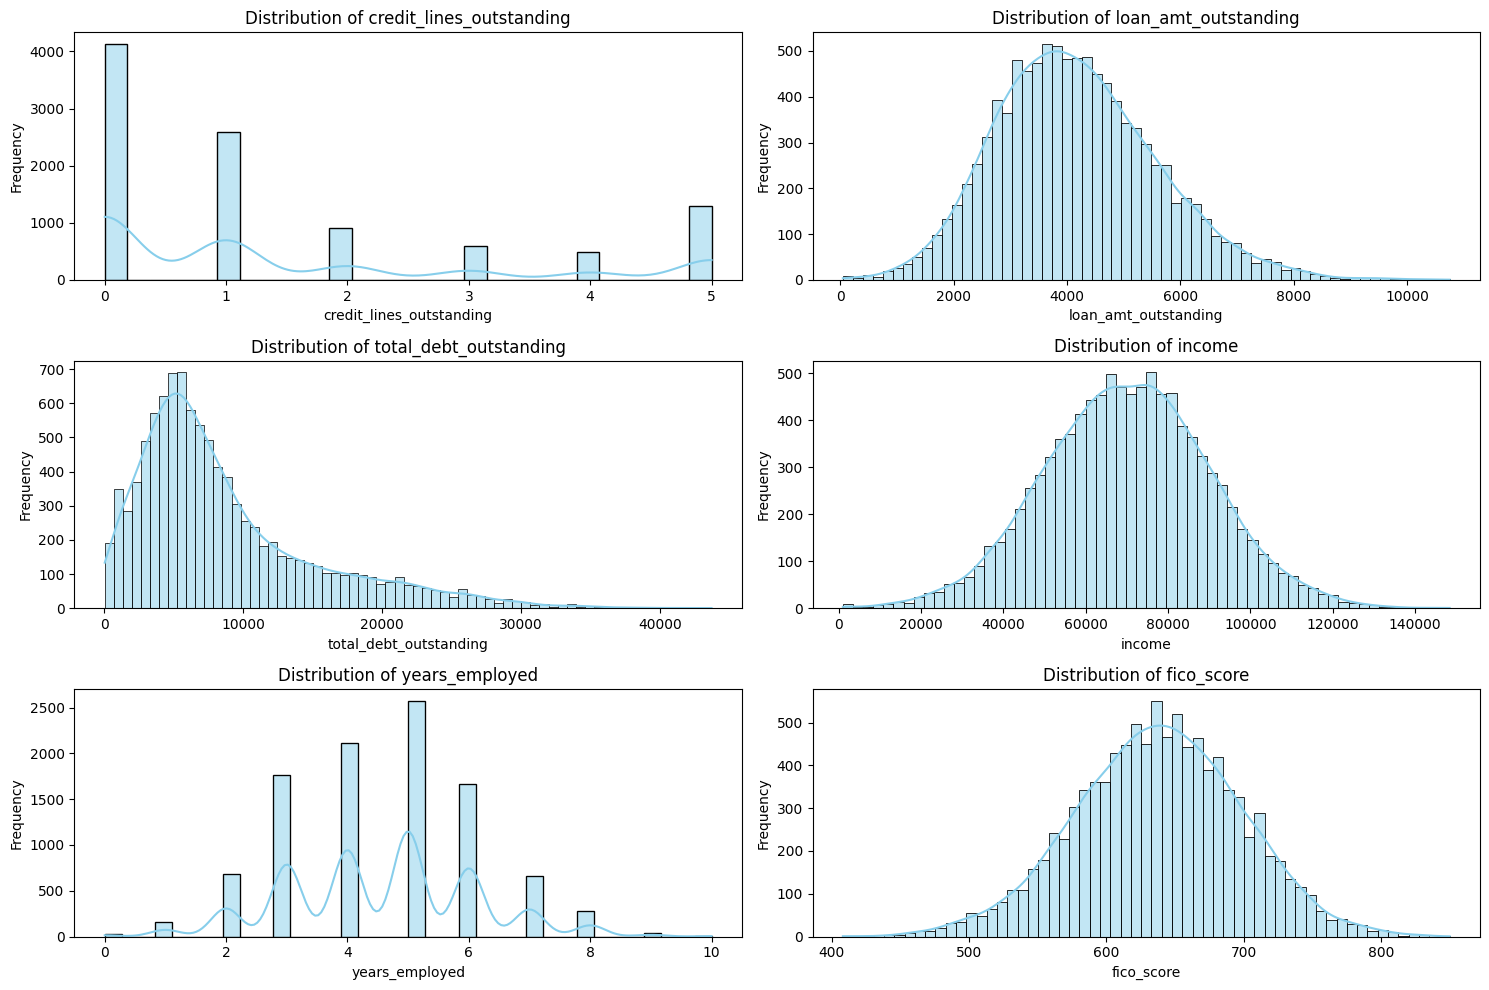

In [33]:
# Liste 
cols = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
# la taille de la figure
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(base[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
plt.tight_layout()
plt.show()


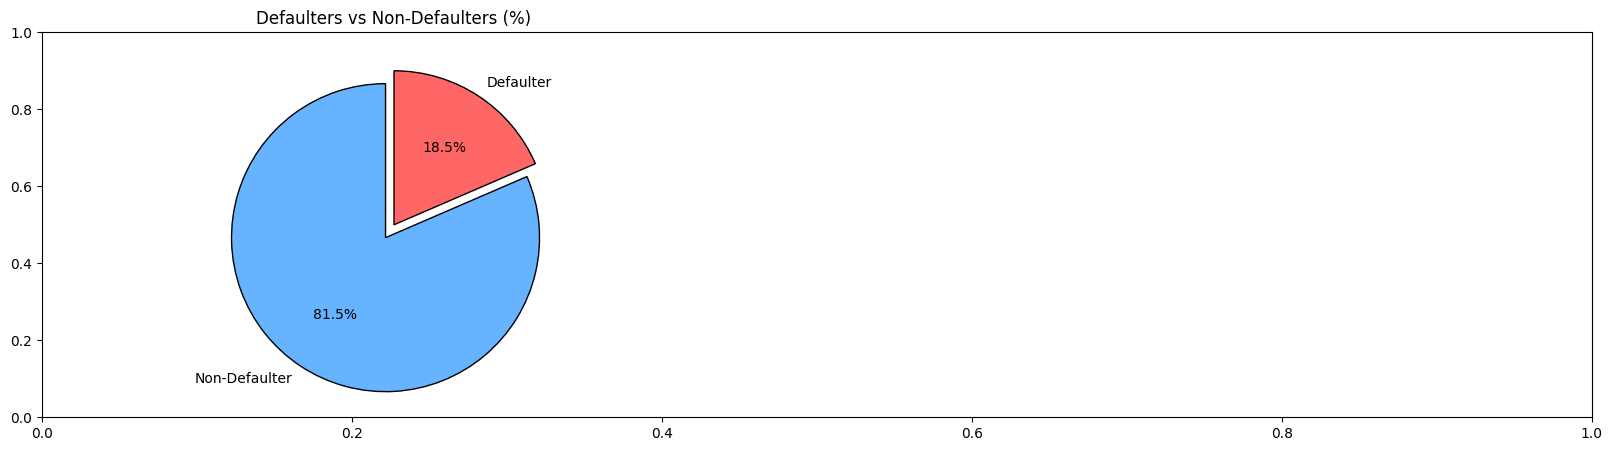

In [34]:
# voyons le taux de default sur la base 

l = list(base['default'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]  
colors = ['#66b3ff','#ff6666']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, 
        labels=['Non-Defaulter', 'Defaulter'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1, 0), 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})


plt.title('Defaulters vs Non-Defaulters (%)')
plt.show()


Avec 18,5 % de clients en défaut, la banque fait face à un risque substantiel de non-remboursement, ce qui pourrait impacter négativement sa rentabilité et sa stabilité financière. Toutefois, une majorité de 81,5 % des clients est en conformité, indiquant que la majorité du portefeuille de prêts reste solide, malgré la présence de ces risques de défauts.

matrice de corrélation

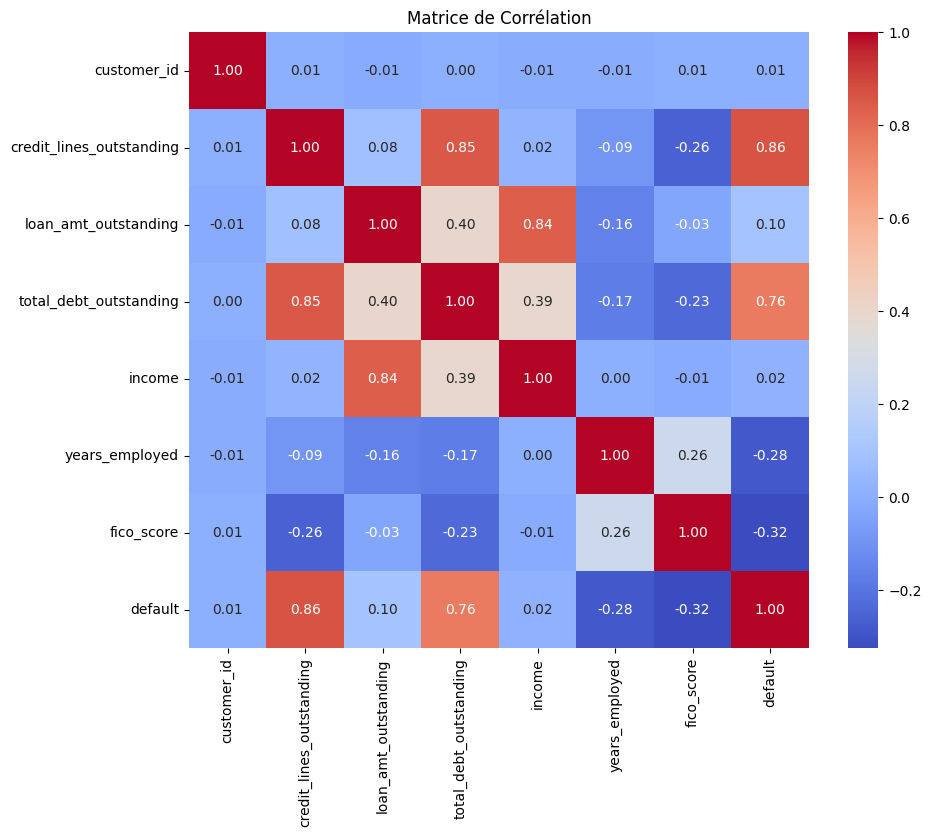

In [35]:
# Calcule de la matrice de corrélation
corr_matrix = base.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


### prétraitement

In [36]:
# Calculons les quartiles
Q1 = base[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']].quantile(0.25)
Q3 = base[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']].quantile(0.75)
IQR = Q3 - Q1

# Détectons les anomalies
anomalies = (base[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']] < (Q1 - 1.5 * IQR)) | (base[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']] > (Q3 + 1.5 * IQR))
print("Nombre d'anomalies détectées : ", anomalies.sum().sum())
print(base[anomalies.any(axis=1)])


Nombre d'anomalies détectées :  875
      customer_id  credit_lines_outstanding  loan_amt_outstanding  \
9         4045948                         0           5396.366774   
37        2671353                         5           5691.710738   
39        7240623                         5           4296.127286   
58        3238472                         5           4604.738825   
75        1729821                         5           4611.226168   
...           ...                       ...                   ...   
9924      8409920                         1            668.922458   
9940      6471742                         5           8042.300351   
9944      3983392                         4           8989.178801   
9974      5183374                         5           3691.123065   
9991      2243629                         5           5181.244374   

      total_debt_outstanding        income  years_employed  fico_score  \
9                5298.824524   92349.55399               2   

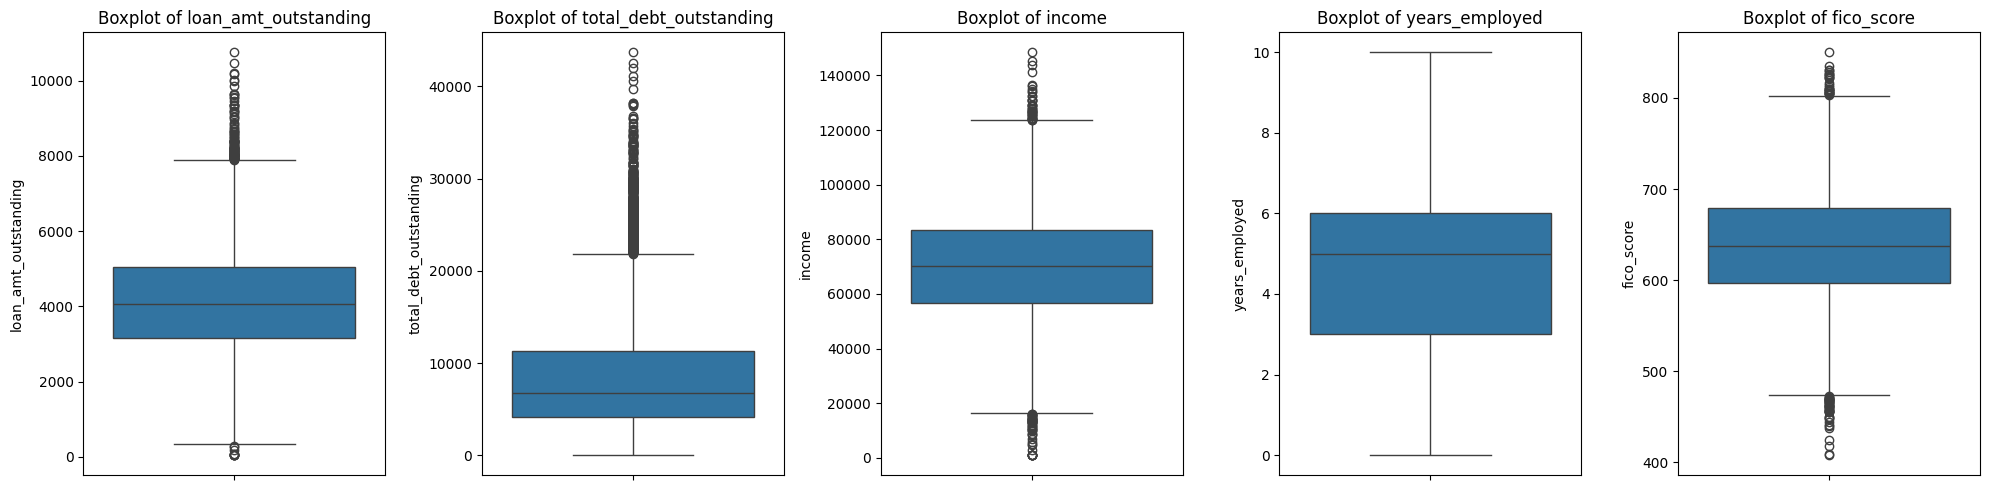

In [37]:
# Boxplots des Variables 
variables = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))
for i, var in enumerate(variables):
    sns.boxplot(data=base, y=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()


traitements des anomalies 

In [38]:
# Suppression des anomalies détectées
clean_base = base[~anomalies.any(axis=1)]
print(f"Nombre de lignes après suppression des anomalies : {clean_base.shape[0]}")


Nombre de lignes après suppression des anomalies : 9203


In [39]:
# Imputation des anomalies avec la médiane
for column in ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']:
    median = base[column].median()
    base[column] = np.where(anomalies[column], median, base[column])


In [40]:
# Transformation logarithmique pour valeurs extrêmes
base['income'] = np.log1p(base['income'])


In [41]:
# Sélection des colonnes à standardiser
numerical_columns = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

# Création de scaler 
scaler = StandardScaler()
base[numerical_columns] = scaler.fit_transform(base[numerical_columns])

# Vérification des données standardisées
print(base.head())


   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0              0.824799   
1      7442532                         5             -1.610187   
2      2256073                         0             -0.562280   
3      4885975                         0              0.485296   
4      4700614                         1             -2.067762   

   total_debt_outstanding    income  years_employed  fico_score  default  
0               -0.753515  0.491241        0.285425   -0.560038        0  
1                0.144236 -3.013026       -1.629325   -1.122507        1  
2               -1.146401 -0.061825       -0.352825   -0.611172        0  
3               -1.047765  0.333594        0.285425   -0.440727        0  
4               -1.200309 -3.430248        0.923675   -0.116881        0  


In [42]:
X = base.drop(columns=['default', 'customer_id']) 
y = base['default'] 

In [43]:
# Division des Données en Ensembles d'Entraînement et de Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### modélisation 
(Régression Logistique et Arbre de Décision)

A-Régression Logistique

In [44]:
# Suréchantillonnage de la classe minoritaire
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [45]:
# Création du modèle
log_model = LogisticRegression(max_iter=1000)

# Entraînement 
log_model.fit(X_train, y_train)

# Prédictions
y_pred_log = log_model.predict(X_test)

Accuracy (Logistic Regression): 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1652
           1       0.99      0.97      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



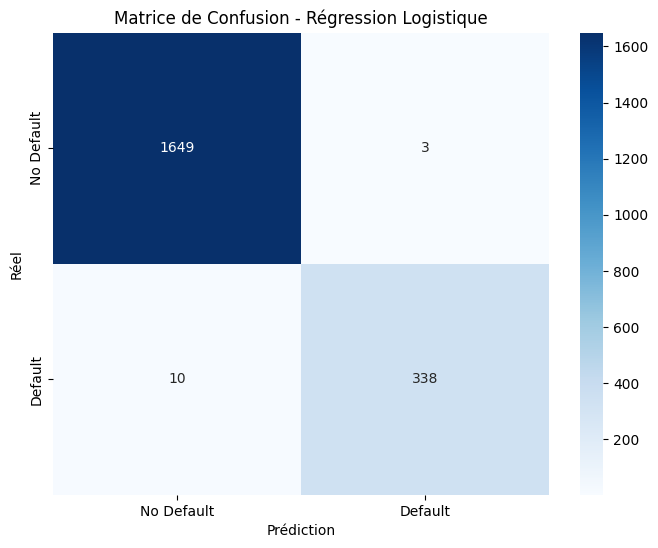

In [46]:
# Évaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy (Logistic Regression): {accuracy_log:.2f}')
print(classification_report(y_test, y_pred_log))
# Matrice de confusion
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()



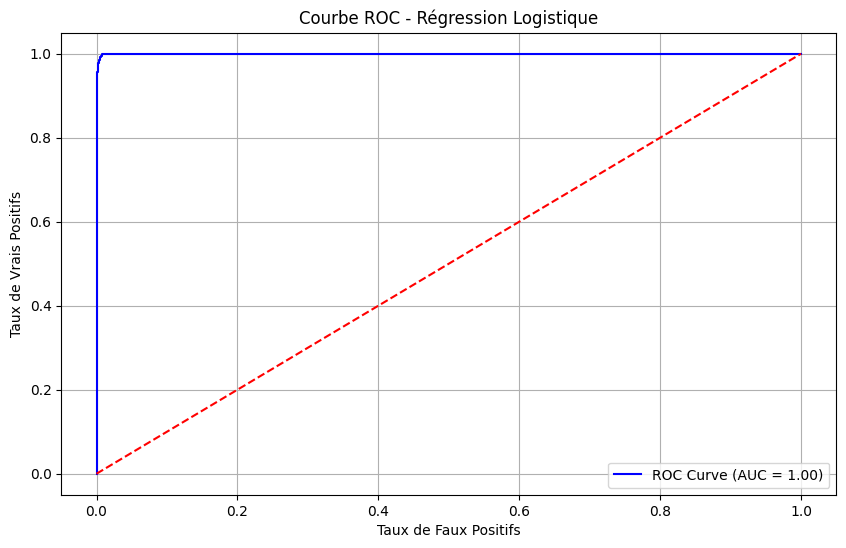

In [47]:
# Calculons les probabilités de prédiction
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Calculons les courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
auc = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Courbe ROC - Régression Logistique')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO THINKPAD T480\AppData\Local\Temp\ipykernel_2088\1728714932.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


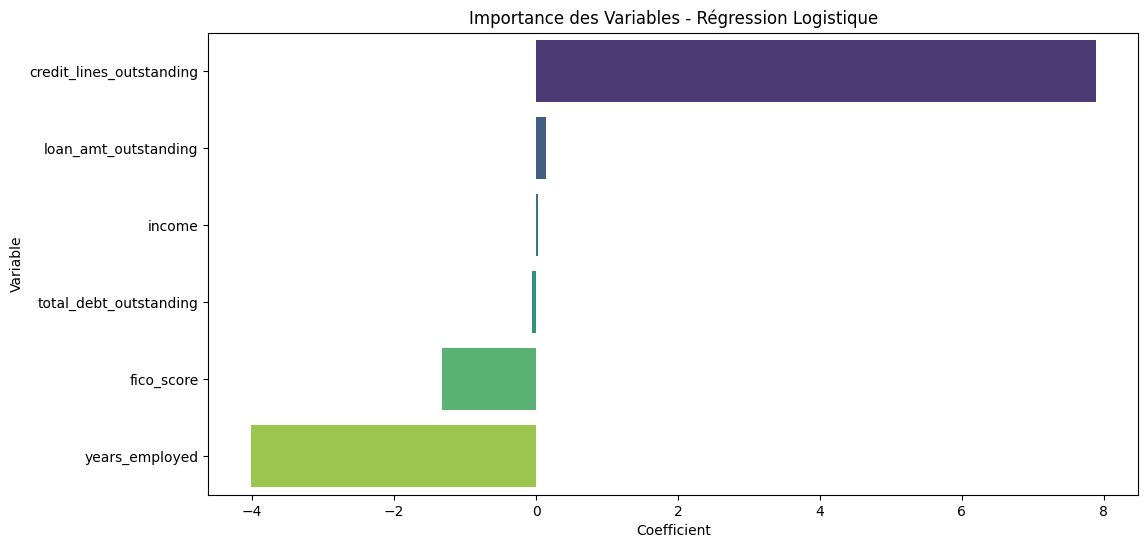

In [48]:
# visualisation 
coefficients = log_model.coef_[0]
features = X.columns

coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Importance des Variables - Régression Logistique')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

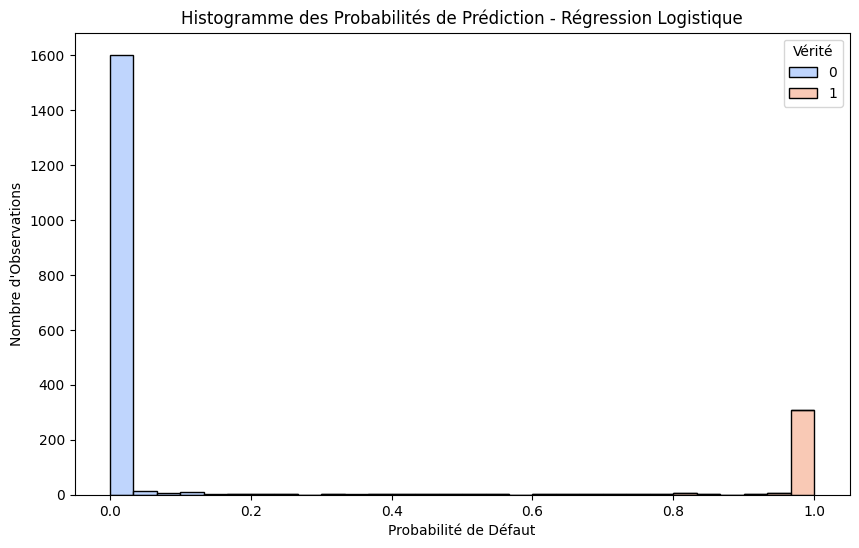

In [49]:
# Histogramme des probabilités de prédiction
pred_prob_df = pd.DataFrame({
    'Probabilité de Défaut': y_prob_log,
    'Vérité': y_test
})

plt.figure(figsize=(10, 6))
sns.histplot(data=pred_prob_df, x='Probabilité de Défaut', hue='Vérité', multiple='stack', palette='coolwarm', bins=30)
plt.title('Histogramme des Probabilités de Prédiction - Régression Logistique')
plt.xlabel('Probabilité de Défaut')
plt.ylabel('Nombre d\'Observations')
plt.show()


B-Arbre de Décision

In [50]:
# Création du modèle
dt_model = DecisionTreeClassifier()

# Entraînement
dt_model.fit(X_train, y_train)

# Prédictions
y_pred_dt = dt_model.predict(X_test)


Accuracy (Decision Tree): 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.98      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



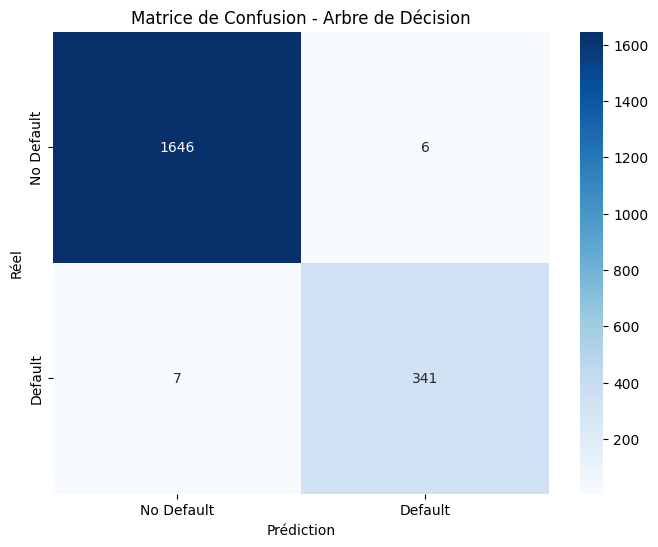

In [51]:
# Évaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy (Decision Tree): {accuracy_dt:.2f}')
print(classification_report(y_test, y_pred_dt))
# Matrice de confusion
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Matrice de Confusion - Arbre de Décision')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()

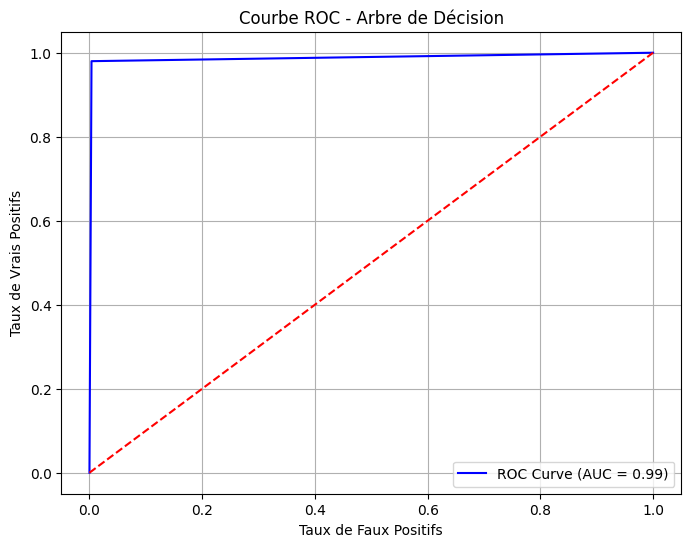

In [52]:
# Calcule des probabilités de prédiction
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
# courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
auc = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Courbe ROC - Arbre de Décision')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO THINKPAD T480\AppData\Local\Temp\ipykernel_2088\782425895.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


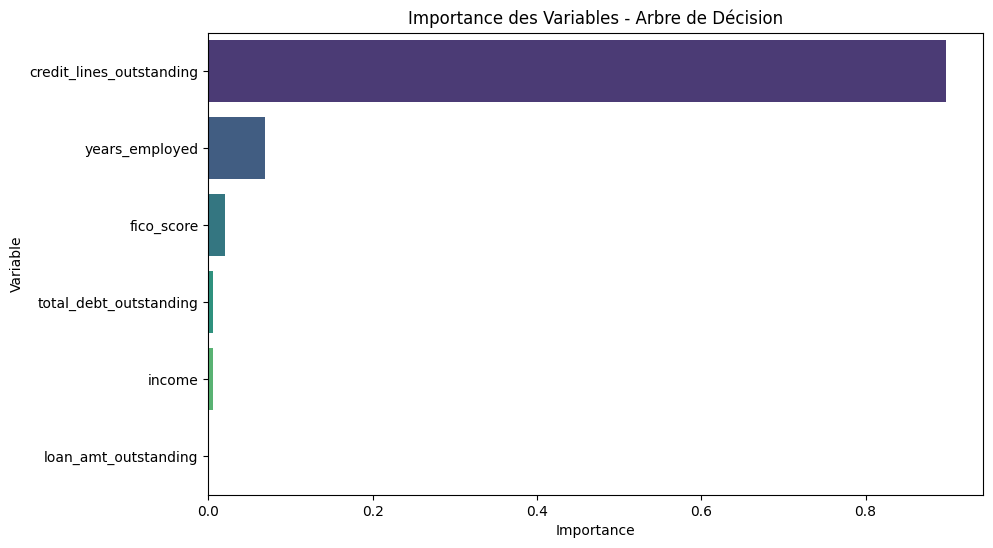

In [53]:
# Importance des variables
importances = dt_model.feature_importances_
features = X.columns

importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Importance des Variables - Arbre de Décision')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

Les deux modèles, régression logistique et arbre de décision, affichent des performances exceptionnelles avec une précision globale de 99%. La régression logistique a légèrement surpassé l'arbre de décision en termes de précision pour la détection des défaillants (classe 1), mais les deux modèles offrent des résultats comparables en termes de rappel et d'autres métriques. Pour améliorer encore ces performances et obtenir des résultats plus robustes, un rééquilibrage des classes sera réalisé afin de mieux gérer les déséquilibres dans les données

### réequilibrage 

In [54]:
# Sélection des caractéristiques et de la cible
X = base[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = base['default']


In [55]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Entraînement du modèle de régression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Entraînement du modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

# Prédictions sur l'ensemble de test avec régression logistique
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Prédictions sur l'ensemble de test avec arbre de décision
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Évaluation des modèles
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Régression Logistique:")
print("Accuracy:", accuracy_log_reg)
print("Classification Report:\n", report_log_reg)

print("Arbre de Décision:")
print("Accuracy:", accuracy_decision_tree)
print("Classification Report:\n", report_decision_tree)


Régression Logistique:
Accuracy: 0.992
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1630
           1       0.96      0.99      0.98       370

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Arbre de Décision:
Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.98      0.99      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      0.99      1.00      2000



En résumé, l'arbre de décision, après rééquilibrage,nous montrent une performance légèrement supérieure à celle de la régression logistique, notamment en termes de précision et de f1-score. Les deux modèles bénéficient du rééquilibrage, mais l'arbre de décision est préféré pour sa précision légèrement meilleure et son f1-score équilibré.On choisira comme meilleur modèle l'arbre de décision. 

#### suite pour déploiement

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Entraînement du modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

# Prédictions sur l'ensemble de test avec arbre de décision
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

# Évaluation du modèle d'arbre de décision
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print("Arbre de Décision:")
print("Accuracy:", accuracy_decision_tree)
print("Classification Report:\n", report_decision_tree)


Arbre de Décision:
Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.98      0.99      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      0.99      1.00      2000



In [59]:
import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    "criterion": "gini", 
    "max_depth": None,  
    "min_samples_split": 2,  
    "min_samples_leaf": 1, 
    "random_state": 42,
}

# Entraîner le modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(**params)
decision_tree_model.fit(X_train, y_train)

# Prédire sur le set de validation
y_pred = decision_tree_model.predict(X_val)

# Calculer les métriques de performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Regrouper les métriques dans un dictionnaire
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
}

# Convertir X_val en un tableau numpy pour éviter le problème
input_example = np.array(X_val.iloc[0]).reshape(1, -1)  

# Lancer le contexte MLflow pour suivre le modèle et ses résultats
with mlflow.start_run(run_name="Decision_Tree_Model") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle entraîné pour une utilisation future
    mlflow.sklearn.log_model(
        sk_model=decision_tree_model,
        artifact_path="decision_tree_model",
        input_example=input_example
    )
    


c:\Users\LENOVO THINKPAD T480\Desktop\projet MLops\my-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO THINKPAD T480\Desktop\projet MLops\my-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
# ---- Enregistrement du modèle avec Pickle ----
import pickle
model_path = "decision_tree_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(decision_tree_model, file)

print(f"Modèle enregistré sous {model_path}")

Modèle enregistré sous decision_tree_model.pkl


In [61]:
# ---- Suivi avec MLflow ----
with mlflow.start_run(run_name="decision_tree_model.pkl") as run:
    # Log des paramètres utilisés pour l'entraînement
    mlflow.log_params(params)

    # Log des métriques calculées
    mlflow.log_metrics(metrics)

    # Log du modèle enregistré avec Pickle pour une utilisation future
    mlflow.log_artifact(model_path)  # Enregistrement du fichier modèle avec MLflow